In [26]:
import numpy as np
import pandas as pd

def generate_oe_matrix(length:int, variance_threshold_L:int = 0.85, variance_threshold_U:int = 1):
    """
        Generates a random 5x5 symmetric matrix with positive values and
        the first PC explaining at least L% and at most U% of the variance.
    """

    while True:
        # Create a nxn array with random positive values
        matrix = np.abs(np.random.randn(length, length) * 10)  # Use absolute values for positive entries
        # Make the array symmetric
        matrix = matrix + matrix.T
        origin_matrix = matrix.copy()

        # Subtract the mean of each row to center the data (For PCA)
        matrix = matrix - matrix.mean(axis=1, keepdims=True)

        # SVD 
        n = len(matrix[0])
        y = matrix.T / np.sqrt(n)
        U, S, Vh = np.linalg.svd(y, full_matrices=True)
        eigenvalues = S * S
        EV1_explained_variance = eigenvalues[0] / np.sum(eigenvalues) 

        # Check if the first PC explains at least the desired variance
        if EV1_explained_variance >= variance_threshold_L and EV1_explained_variance < variance_threshold_U:
            return origin_matrix

length = 5
# Generate a simulated O/E matrix.
X = generate_oe_matrix(length=length)

In [27]:
d = len(X)
I = np.array([1 for i in range(d)])
std = np.std(X, axis=1)
C = X.mean(axis=1, keepdims=True).flatten()

corr = ((X - np.outer(C, I)) @ (X - np.outer(C, I)).T) / (d * np.outer(std, std))

print(corr, '\n')
print(np.corrcoef(X), '\n')

print(d * np.outer(std, std))

[[ 1.          0.8021262   0.91027317 -0.17734132  0.32648384]
 [ 0.8021262   1.          0.92757635 -0.64030644  0.82358859]
 [ 0.91027317  0.92757635  1.         -0.56572872  0.58638778]
 [-0.17734132 -0.64030644 -0.56572872  1.         -0.79990698]
 [ 0.32648384  0.82358859  0.58638778 -0.79990698  1.        ]] 

[[ 1.          0.8021262   0.91027317 -0.17734132  0.32648384]
 [ 0.8021262   1.          0.92757635 -0.64030644  0.82358859]
 [ 0.91027317  0.92757635  1.         -0.56572872  0.58638778]
 [-0.17734132 -0.64030644 -0.56572872  1.         -0.79990698]
 [ 0.32648384  0.82358859  0.58638778 -0.79990698  1.        ]] 

[[1022.91747009  505.35013879  325.63832357  147.55090493  269.18422034]
 [ 505.35013879  249.65725021  160.87453467   72.89431696  132.98461224]
 [ 325.63832357  160.87453467  103.66458769   46.97175552   85.69283525]
 [ 147.55090493   72.89431696   46.97175552   21.28350545   38.82852377]
 [ 269.18422034  132.98461224   85.69283525   38.82852377   70.83674548]

In [28]:
import numpy as np
a = np.array([
    [1, 2, 3],
    [1, 2, 3],
    [1, 2, 3],
])

np.std(a, axis=1)

array([0.81649658, 0.81649658, 0.81649658])

In [29]:
np.power(2/3, 1/2)

0.816496580927726

[[1.         0.77962369]
 [0.77962369 1.        ]]


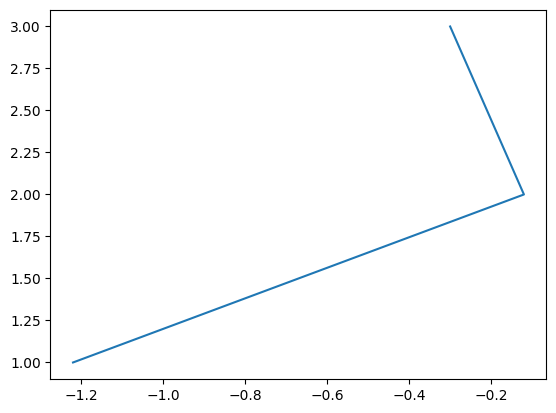

In [30]:
import numpy as np
from matplotlib import pyplot as plt

a = np.array([-1.22, -0.12, -0.3])
b = np.array([1, 2, 3])

print(np.corrcoef(a, b))
plt.plot(a, b)

In [31]:
from numpy import dot
from numpy.linalg import norm

cos_sim = dot(a, b)/(norm(a)*norm(b))
cos_sim

-0.49976675337386894